In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

rho
[0] after_full_step


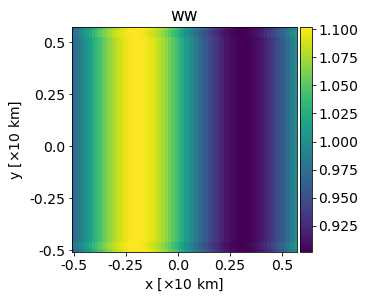

In [4]:
attribute = 'p2_nodes'
attribute = 'rho'
et = 0.002673
print(attribute)

base_fn = "output_acoustic_wave"
directory = "output_acoustic_wave"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

l_typ = 'WINDOW_STEP'
times = [0]
tags = tc.get_tag_dict()
tag = tags[9]

print(times, tag)
# if len(times) < 1:
#     tag = 'ic' if times[0] == 0.0 else tags[9]

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    inner = False
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=inner, load_ic=False)#[1:]
    rho = tc.get_ensemble(times, 1, 'rho', sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=inner, load_ic=False)#[1:]
    
    if len(times) > 1:
        ens = ens[1] - ens[0]
    else:
        ens = ens[0]
    ens = ens.T
#     
    label = sfx + '_' + attribute
    return label, ens

diff = False

sfx_ref = 'ww'

_, ll_ref = get_ens(tc, sfx_ref, diff, attribute)
    
ll = [[ll_ref,sfx_ref]]
pl_lst = ll

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)

x_label = r'x [$\times 10$ km]'
y_label = r'y [$\times 10$ km]'

axvline = 32
axhline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='imshow')

rho
[39] after_full_step
1.1912947 0.8814441 0.30985057


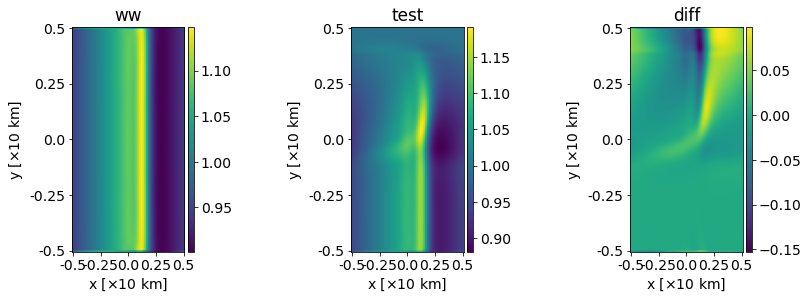

In [174]:
attribute = 'p2_nodes'
attribute = 'rho'
et = 0.002673
print(attribute)

base_fn = "output_acoustic_wave"
directory = "output_acoustic_wave"
py_directory = "../%s/" %directory

Nx, Ny = 64, 128
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

l_typ = 'WINDOW_STEP'
times = [39]
tags = tc.get_tag_dict()
tag = tags[9]

print(times, tag)
# if len(times) < 1:
#     tag = 'ic' if times[0] == 0.0 else tags[9]

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    inner = True
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=inner, load_ic=False)#[1:]
    rho = tc.get_ensemble(times, 1, 'rho', sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=inner, load_ic=False)#[1:]
    
    if len(times) > 1:
        ens = ens[1] - ens[0]
    else:
        ens = ens[0]
    ens = ens.T
#     
    label = sfx + '_' + attribute
    return label, ens#[:64]

diff = False

sfx_ref = 'ww'
sfx1 = 'test'

# l2, a1 = get_ens(tc, sfx1, diff, 'rho')
l2, a2 = get_ens(tc, sfx1, diff, attribute)

_, ll_ref = get_ens(tc, sfx_ref, diff, attribute)
aa = a2
print(aa.max(), aa.min(), aa.max() - aa.min())
lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
# print(aa.shape)
# if sfx1 == 'artigen' or sfx1=='psinc':
#     np.save('ic_%s_%s.npy' %(attribute,sfx1), aa.T)
diff = aa - ll_ref
    
ll = [[ll_ref,sfx_ref],[aa, sfx1], [diff, 'diff']]
pl_lst = ll

pl = pt.plotter(pl_lst,ncols=3,figsize=(12,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)

x_label = r'x [$\times 10$ km]'
y_label = r'y [$\times 10$ km]'

axvline = 32
axhline = 32

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='imshow')

In [31]:
swe = False

attribute = 'p2_nodes'
# attribute = 'rhoX'
et = 1.0
print(attribute)

base_fn = "output_acoustic_wave"
directory = "output_acoustic_wave"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

l_typ = 'WINDOW_STEP'
times = [0]
tags = tc.get_tag_dict()
tag = tags[9]

print(times, tag)
# if len(times) < 1:
#     tag = 'ic' if times[0] == 0.0 else tags[9]

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    rho = tc.get_ensemble(times, 1, 'rho', sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    if swe:
        ens = ens[:,0,:]
#     else:
#         ens *= 100.0
    if len(times) > 1:
        ens = ens[1] - ens[0]
    else:
        ens = ens[0]
    ens = ens.T #/ rho.T
#     ens = ens.T
#     
    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_imbal_half_CFLfixed_ib-0'
sfx_ref = 'psinc_noib_CFLfixed'

sfx_ref = 'psinc_debug_CFLfixed'
# sfx1 = 'debug_imbal_CFLfixed_ib-0'
sfx1 = 'truth_CFLfixed_ib-0'
# sfx1 = 'comp_imbal_noib_CFLfixed'

l2, a1 = get_ens(tc, sfx1, diff, 'rho', swe=False)
l2, a2 = get_ens(tc, sfx1, diff, attribute, swe=False)
la = 'Euler vortex'

# times = [0]
# tag = tags[9]
_, ll_ref = get_ens(tc, sfx_ref, diff, attribute, swe=False)
aa = a2
print(aa.max(), aa.min(), aa.max() - aa.min())
lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
print(aa.shape)
if sfx1 == 'artigen' or sfx1=='psinc':
    np.save('ic_%s_%s.npy' %(attribute,sfx1), aa.T)
    
diff = ll_ref - aa
ll = [[aa, sfx1], [ll_ref, 'psinc'], [diff, 'diff']]
pl_lst = ll

pl = pt.plotter(pl_lst,ncols=3,figsize=(25,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 79.5
axhline = 39.5

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')

lbl = 'swe' if swe else 'euler'
# pl.save_fig('./output/euler_imprint')

p2_nodes
[0] after_full_step


OSError: Unable to open file (unable to open file: name = '../output_acoustic_wave/output_acoustic_wave_ensemble=1_64_64_1.000000_truth_CFLfixed_ib-0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)